# K-nearest neighbors

In [1]:
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import random
import time

print('Packages loaded')


Packages loaded


In [2]:
class KNN:
    def __init__(self, train_set, label_set):
        """
        :param train_set: m*n ndarray, m:dims, n:train points
        :param label_set: 1*n int ndarray and from 0 to n-1
        """
        self.train_set = train_set
        self.label_set = label_set
        self.m, self.n = self.train_set.shape

    def knn_naive(self, test_set, k=1,p=2):
        """
        :param test_set: m*n ndarray, m:dims, n:test points
        :param k: k nearest neighbor
        :param p: order of norm
        :return: 1*n list for n points
        """
        (m,n)=test_set.shape
        # 有几个点，输出对于shape的list
        final=[-1]*n

        for i in range(n):
            # 转置后取点再转置
            test_point=test_set.T[i].T
            # 有些可能是(m,)的ndarray
            test_point=test_point.reshape([m,1])
            # 计算距离
            distance=np.linalg.norm(self.train_set-test_point,ord=p,axis=0)
            # 最近k个点的index
            nearestK=np.argsort(distance)[:k]
            # label是0，1，2，...的顺序，存储对应label出现的总次数
            labelList=[0]*(max(self.label_set) + 1)
            
            for index in nearestK:
                labelList[int(self.label_set[index])] +=1
                point_label=labelList.index(max(labelList))
            final[i]=point_label
        return final

    def knn_kdtree(self):
        pass

    def score(self):
        pass

    def plot(self, points=None):
        '''
        画不同k从而分割成不同子%tb域的图
        画结果图
        '''
        if self.m != 2:
            return "Unable to draw a picture"

## Example (iris)
### dataset informations and visualization

df =
      sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]

dataset =  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3

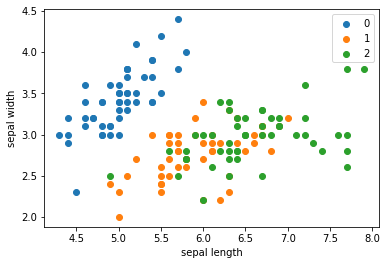

In [3]:
from sklearn.datasets import load_iris

iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
print('df =\n',df)

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.scatter(df[100:]['sepal length'], df[100:]['sepal width'], label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

(dataset,labelset)=load_iris(return_X_y=True)
print('\ndataset = ',dataset[:10],'\nlabelset = ',labelset[:10],'\n')

In [4]:
model=KNN(dataset.T,labelset.T)
test=np.array([[1,1,1,1],[4,2,6,4],[6,8,4,3]])
print('labels for each n test point: ',model.knn_naive(test.T))


labels for each n test point:  [0, 2, 1]


In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier(n_neighbors=1)
clf_sk.fit(dataset, labelset)
print('labels (by sklearn) for each n test point: ',clf_sk.predict(test))


labels (by sklearn) for each n test point:  [0 2 1]


df =
      sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]

dataset =  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3

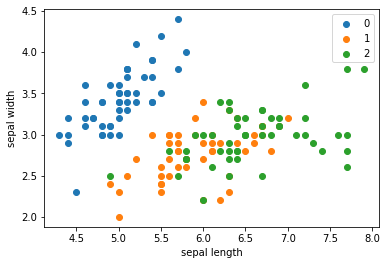

In [3]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier(n_neighbors=1)
clf_sk.fit(dataset, labelset)
print('labels (by sklearn) for each n test point: ',clf_sk.predict(test))


In [4]:
model=KNN(dataset.T,labelset.T)
test=np.array([[1,1,1,1],[4,2,6,4],[6,8,4,3]])
print('labels for each n test point: ',model.knn_naive(test.T))


labels for each n test point:  [0, 2, 1]


In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier(n_neighbors=1)
clf_sk.fit(dataset, labelset)
print('labels (by sklearn) for each n test point: ',clf_sk.predict(test))


labels (by sklearn) for each n test point:  [0 2 1]
